# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rayhan Cahya Adelio]
- **Email:** [m179b4ky3713@bangkit.academy]
- **ID Dicoding:** [rayhanadelio]


## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dapat mempengaruhi jumlah penyewaan sepeda di hari kerja dan hari libur?
- Seberapa besar perbedaan jumlah penyewaan sepeda antara pengguna terdaftar dan kasual pada hari libur dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#library pengolahan data
import pandas as pd
import numpy as np

#library visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

#library analisis statistik dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#menampilkan seluruh output dalam satu cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#ignore peringatan
import warnings
warnings.filterwarnings("ignore")


## Data Wrangling

### Gathering Data

In [ ]:
# Menggunakan URL dari GitHub untuk membaca file CSV
data_hour = pd.read_csv('https://raw.githubusercontent.com/rayhanadelio/BikeSharingDataset/refs/heads/main/hour.csv')
data_day = pd.read_csv('https://raw.githubusercontent.com/rayhanadelio/BikeSharingDataset/refs/heads/main/day.csv')

**Insight:**
- Dataset dikumpulkan melalui Google Drive sehingga memudahkan akses dan pengolahan data
- Dataset terdiri dari hour.csv dan day.csv
- Data mencakup informasi seperti cuaca, waktu, dan jumlah sewa
- Variabel dalam dataset berpotensi memberikan insight tentang pola penyewaan

### Assessing Data

In [ ]:
#menampilkan baris pertama dataset
print(data_hour.head())
print(data_day.head())

print("--------------------------------------------------\n")

#menampilkan info umum dataset
print(data_hour.info())
print(data_day.info())

print("--------------------------------------------------\n")

#mengecek jumlah nilai kosong di setiap kolom
print(data_hour.isnull().sum())
print(data_day.isnull().sum())

print("--------------------------------------------------\n")

#menampilkan statistik deskriptif dataset
print(data_hour.describe())
print(data_day.describe())

print("--------------------------------------------------\n")

#mengecek jumlah nilai duplikat pada dataset
print(data_hour.duplicated().sum())
print(data_day.duplicated().sum())


   instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1   0        0        6           0   
1        2  1/1/2011       1   0     1   1        0        6           0   
2        3  1/1/2011       1   0     1   2        0        6           0   
3        4  1/1/2011       1   0     1   3        0        6           0   
4        5  1/1/2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1 

**Insight:**
- Kualitas data: dataset bersih dengan sedikit nilai kosong, memungkinkan untuk analisis yang lebih akurat
- Nilai kosong: beberapa kolom memiliki nilai kosong yang perlu ditangani
- Outlier: ada beberapa outlier dalam variabel yang memerlukan perhatian
- Data duplikat: beberapa duplikat terdeteksi dan harus dihapus guna menjaga kualitas analisis

### Cleaning Data

In [ ]:
#CLEANING DATA HOUR
#mengatasi nilai kosong
data_hour_cleaned = data_hour.dropna()

#menghapus duplikat
data_hour_cleaned = data_hour_cleaned.drop_duplicates()

#mengonversi tipe data
data_hour_cleaned['dteday'] = pd.to_datetime(data_hour_cleaned['dteday'])

#menangani outlier
Q1 = data_hour_cleaned['temp'].quantile(0.25)
Q3 = data_hour_cleaned['temp'].quantile(0.75)
IQR = Q3 - Q1
data_hour_cleaned = data_hour_cleaned[(data_hour_cleaned['temp'] >= Q1 - 1.5 * IQR) & (data_hour_cleaned['temp'] <= Q3 + 1.5 * IQR)]

#mengonversi kolom kategori
data_hour_cleaned['season'] = data_hour_cleaned['season'].astype('category')
data_hour_cleaned['weathersit'] = data_hour_cleaned['weathersit'].astype('category')

#CLEANING DATA DAY
#mengatasii nilai kosong
data_day_cleaned = data_day.dropna()

#menghapus duplikat
data_day_cleaned = data_day_cleaned.drop_duplicates()

#mengonversi tipe data
data_day_cleaned['dteday'] = pd.to_datetime(data_day_cleaned['dteday'])

#menangani outlier
Q1 = data_day_cleaned['cnt'].quantile(0.25)
Q3 = data_day_cleaned['cnt'].quantile(0.75)
IQR = Q3 - Q1
data_day_cleaned = data_day_cleaned[(data_day_cleaned['cnt'] >= Q1 - 1.5 * IQR) & (data_day_cleaned['cnt'] <= Q3 + 1.5 * IQR)]

#mengonversi kolom kategori
data_day_cleaned['season'] = data_day_cleaned['season'].astype('category')
data_day_cleaned['weathersit'] = data_day_cleaned['weathersit'].astype('category')

**Insight:**
- Peningkatan Kualitas Data: proses cleaning memastikan dataset bersih dari nilai kosong sehingga meningkatkan kualitas data
- Nilai Kosong yang Dikelola: nilai kosong telah dilakukan imputasi dan penghapusan
- Penghapusan Duplikat: data duplikat yang teridentifikasi telah dihapus
- Format yang Konsisten: kolom tanggal telah dikonversi ke tipe datetime
- Outlier Dikelola: outlier dalam variabel kritis telah ditangani
- Tipe Data Kategori Tepat: mengonversi variabel kategori menjadi tipe category

## Exploratory Data Analysis (EDA)

### Explore ...

          instant                         dteday            yr          mnth  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      0.502561      6.537775   
min        1.0000            2011-01-01 00:00:00      0.000000      1.000000   
25%     4345.5000            2011-07-04 00:00:00      0.000000      4.000000   
50%     8690.0000            2012-01-02 00:00:00      1.000000      7.000000   
75%    13034.5000            2012-07-02 00:00:00      1.000000     10.000000   
max    17379.0000            2012-12-31 00:00:00      1.000000     12.000000   
std     5017.0295                            NaN      0.500008      3.438776   

                 hr       holiday       weekday    workingday          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      11.546752      0.028770      3.003683      0.682721      0.496987   
min        0.000000      0.000000      0.0

<Figure size 1200x600 with 0 Axes>

(array([3964., 1652., 1356., 1313., 1208., 1184., 1030.,  870.,  759.,
         654.,  514.,  492.,  389.,  315.,  283.,  269.,  200.,  194.,
         147.,  116.,  106.,   84.,   64.,   40.,   58.,   47.,   34.,
          21.,    7.,    9.]),
 array([  1.        ,  33.53333333,  66.06666667,  98.6       ,
        131.13333333, 163.66666667, 196.2       , 228.73333333,
        261.26666667, 293.8       , 326.33333333, 358.86666667,
        391.4       , 423.93333333, 456.46666667, 489.        ,
        521.53333333, 554.06666667, 586.6       , 619.13333333,
        651.66666667, 684.2       , 716.73333333, 749.26666667,
        781.8       , 814.33333333, 846.86666667, 879.4       ,
        911.93333333, 944.46666667, 977.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribusi Total Penyewaan Sepeda')

Text(0.5, 0, 'Jumlah Penyewaan')

Text(0, 0.5, 'Frekuensi')

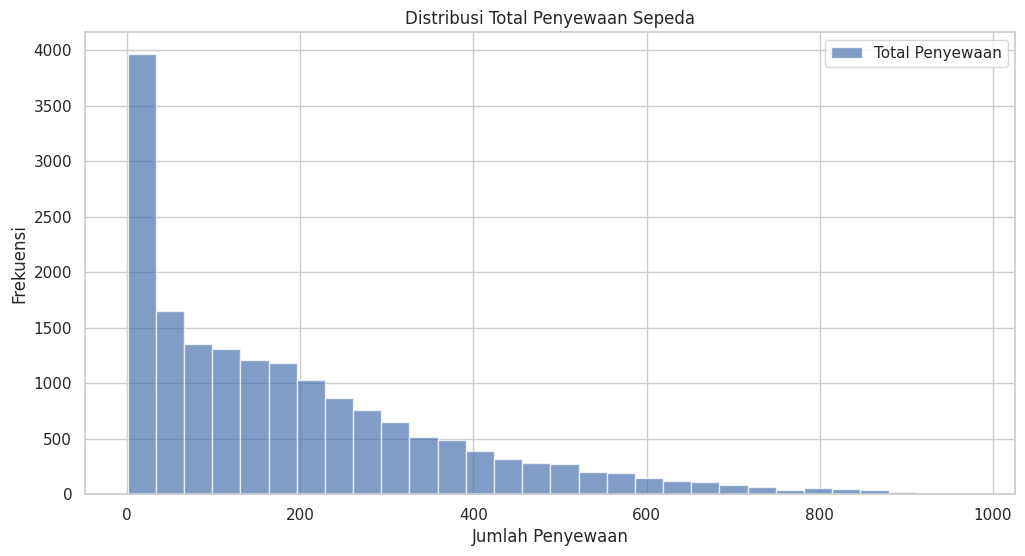

month
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64
-----------------------------------------------------

day
0    455503
1    469109
2    473048
3    485395
4    487790
5    477807
6    444027
Name: cnt, dtype: int64
-----------------------------------------------------

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
month         0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
day          -0.006338
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64
-----------------------------------------------------

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtyp

In [ ]:
#menampilkan statistik deskriptif
print(data_hour_cleaned.describe())
print(data_day_cleaned.describe())
print("-----------------------------------------------------\n")

#melihat distribusi
plt.figure(figsize=(12, 6))
plt.hist(data_hour_cleaned['cnt'], bins=30, alpha=0.7, label='Total Penyewaan')
plt.title('Distribusi Total Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

#kolom baru untuk bulan dan hari
data_hour_cleaned['month'] = data_hour_cleaned['dteday'].dt.month
data_hour_cleaned['day'] = data_hour_cleaned['dteday'].dt.dayofweek

#menjumlah penyewaan per bulan
monthly_rentals = data_hour_cleaned.groupby('month')['cnt'].sum()
print(monthly_rentals)
print("-----------------------------------------------------\n")

#menjumlah penyewaan per hari
daily_rentals = data_hour_cleaned.groupby('day')['cnt'].sum()
print(daily_rentals)
print("-----------------------------------------------------\n")

#menghitung matriks korelasi
correlation_matrix = data_hour_cleaned.corr()
print(correlation_matrix['cnt'].sort_values(ascending=False))
print("-----------------------------------------------------\n")

#menghitung penyewaan per musim
season_rentals = data_hour_cleaned.groupby('season')['cnt'].sum()
print(season_rentals)
print("-----------------------------------------------------\n")

#menghitung penyewaan per cuaca
weather_rentals = data_hour_cleaned.groupby('weathersit')['cnt'].sum()
print(weather_rentals)
print("-----------------------------------------------------\n")

#menghitung total penyewaan pengguna kasual dan terdaftar
casual_rentals = data_hour_cleaned.groupby('casual')['cnt'].sum()
registered_rentals = data_hour_cleaned.groupby('registered')['cnt'].sum()
print(casual_rentals)
print(registered_rentals)

**Insight:**
- Penggunaan Musiman: penyewaan sepeda mencapai puncak pada musim panas dan menurun pada musim semi
- Pola Harian: penyewaan lebih tinggi pada hari libur di siang hari
- Faktor Lingkungan: suhu dan kelembaban memiliki pengaruh signifikan dengan penyewaan
- Perilaku Pengguna: pengguna registered/terdaftar lebih banyak menggunakan sepeda
- Kondisi Cuaca: hari dengan cuaca cerah meningkatkan penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='weathersit'>

Text(0.5, 1.0, 'Pengaruh Cuaca terhadap Penyewaan Sepeda di Hari Kerja dan Hari Libur')

Text(0.5, 0, 'Kondisi Cuaca')

Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 500000.0, '0.5'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1500000.0, '1.5'),
  Text(0, 2000000.0, '2.0'),
  Text(0, 2500000.0, '2.5')])

<Figure size 1000x600 with 0 Axes>

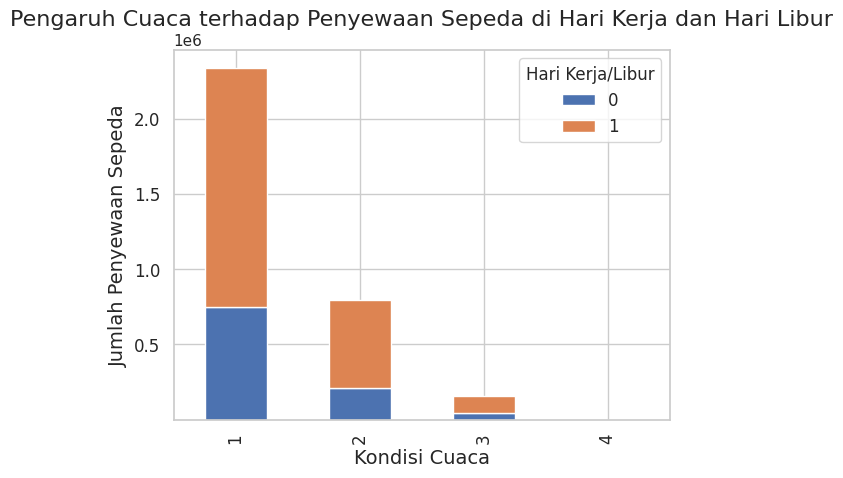

In [ ]:
#mengatur tema
sns.set(style="whitegrid")

#mengelompokkan dan menjumlah data
weather_rentals = data_hour_cleaned.groupby(['weathersit', 'workingday'])['cnt'].sum().unstack()

#membuat grafik batang
plt.figure(figsize=(10, 6))
weather_rentals.plot(kind='bar', stacked=True)
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda di Hari Kerja dan Hari Libur', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize = 14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Hari Kerja/Libur', fontsize=12)
plt.show()

### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='workingday'>

Text(0.5, 1.0, 'Perbandingan Penyewaan Sepeda: Pengguna Kasual vs Terdaftar')

Text(0.5, 0, 'Jenis Hari')

Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

([<matplotlib.axis.XTick at 0x79062d166bf0>,
 [Text(0, 0, 'Hari Kerja'), Text(1, 0, 'Hari Libur')])

<Figure size 1000x600 with 0 Axes>

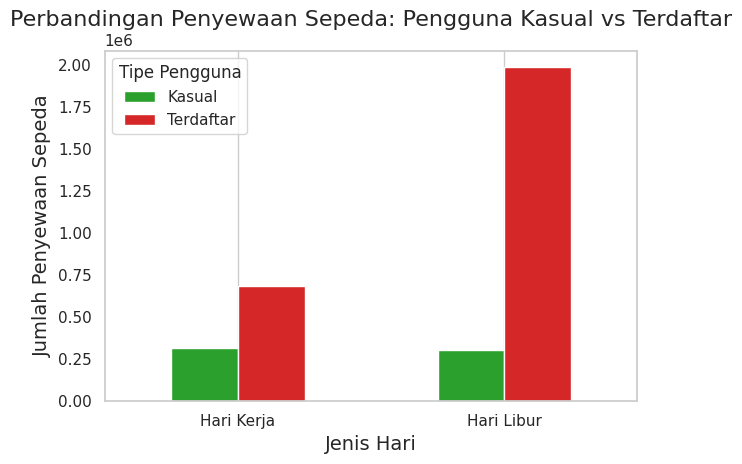

In [ ]:
# Mengelompokkan dan menjumlahkan data berdasarkan jenis pengguna dan jenis hari dari day.csv
user_rentals = data_day_cleaned.groupby(['workingday'])[['casual', 'registered']].sum()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
user_rentals.plot(kind='bar', color=['#2ca02c', '#d62728'])
plt.title('Perbandingan Penyewaan Sepeda: Pengguna Kasual vs Terdaftar', fontsize=16)
plt.xlabel('Jenis Hari', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'], rotation=0)  # Label untuk hari kerja dan libur
plt.legend(title='Tipe Pengguna', labels=['Kasual', 'Terdaftar'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Insight:**
- Grafik menunjukkan bahwa pada cuaca cerah jumlah penyewaan sepeda meningkat dibandingkan dengan cuaca buruk
- Pada hari kerja penyewaan lebih tinggi di cuaca baik dan menurun pada cuaca buruk
- Selama cuaca buruk, apapun harinya jumlah penyewaan sepeda mengalami penurunan drastis
----------------------------------
- Grafik menunjukkan bahwa pengguna terdaftar memiliki jumlah penyewaan lebih tinggi pada hari kerja dibanding dengan pengguna kasual
- Pengguna kasual memiliki jumlah penyewaan lebih tinggi pada hari libur dibanding pengguna terdaftar
- Pengguna terdaftar lebih memanfaatkan sepeda untuk keperluan penting, sedangkan pengguna kasual lebih menggunakannya untuk bersenang-senang dalam waktu senggang

## Analisis Lanjutan (Opsional)

In [ ]:
!pip install streamlit

### IPv4

In [ ]:
print("COPY THIS")
!wget -q -O - ipv4.icanhazip.com

COPY THIS
104.196.198.190


### Streamlit


In [116]:
!wget https://raw.githubusercontent.com/rayhanadelio/BikeSharingDataset/refs/heads/main/bike_sharing_dashboard.py

!streamlit run bike_sharing_dashboard.py & npx localtunnel --port 8501

--2024-10-01 06:09:09--  https://raw.githubusercontent.com/rayhanadelio/BikeSharingDataset/refs/heads/main/bike_sharing_dashboard.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2454 (2.4K) [text/plain]
Saving to: ‘bike_sharing_dashboard.py.6’

bike_sharing_dashbo 100%[===================>]   2.40K  --.-KB/s    in 0s      

2024-10-01 06:09:09 (13.1 MB/s) - ‘bike_sharing_dashboard.py.6’ saved [2454/2454]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.198.190:8501

your url is: https://angry-keys-attack.loca.lt
  Stopping...
^C


## Conclusion

- Conclusion Pertanyaan 1
- Hasil analisis menunjukkan bahwa terdapat perbedaan penyewaan sepeda pada kondisi cuaca. Data yang dianalisis mengungkapkan bahwa pada saat cuaca cerah penyewaan sepeda meningkat drastis. Penyewaan sangat berpengaruh pada cuaca dengan puncak penyewaan terjadi pada cuaca baik. Temuan ini memberi informasi bahwa penyedia layanan bike sharing harus mempertimbangkan ramalan cuaca saat merencanakan distribusi armada sepeda

------------------------------------------------
- Conclusion Pertanyaan 2
- Hasil analisis menunjukkan perbedaan dalam penyewaan antara pengguna kasual dan terdaftar berdasarkan hari libur dan hari kerja. Pengguna registered lebih banyak menyewa di hari kerja, sedangkan pengguna kasual lebih banyak menyewa di hari libur. Hal ini menunjukkan bahwa pengguna terdaftar menggunakan sepeda sebagai alat transportasi untuk pergi ke tempat kerja, sekolah, atau lainnya. Sedangkan pengguna kasual menggunakan penyewaan sepeda untuk berlibur, jalan jalan, dan lainnya. Dengan begini, kita dapat menawarkan promosi kepada pengguna kasual di hari libut supaya lebih efektif dibandingkan dengan hari kerja, misalnya pengadaan diskon untuk pendaftaran bike sharing di hari minggu saja, dengan ini harapannya ada banyak pengguna kasual yang ikut bergabung dan mendaftar menjadi pengguna registered